Data Preprossesing with Data Visualization

Missing values in each column:
 age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

Summary statistics:
               age         sex          cp      trtbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.366337    0.683168    0.966997  131.623762  246.264026    0.148515   
std      9.082101    0.466011    1.032052   17.538143   51.830751    0.356198   
min     29.000000    0.000000    0.000000   94.000000  126.000000    0.000000   
25%     47.500000    0.000000    0.000000  120.000000  211.000000    0.000000   
50%     55.000000    1.000000    1.000000  130.000000  240.000000    0.000000   
75%     61.000000    1.000000    2.000000  140.000000  274.500000    0.000000   
max     77.000000    1.000000    3.000000  200.000000  564.000000    1.000000   

       

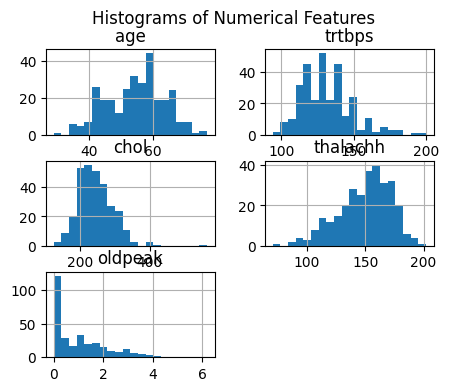

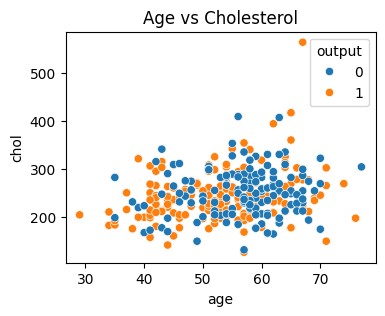

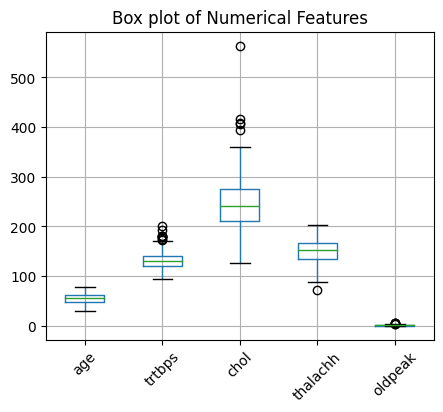

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


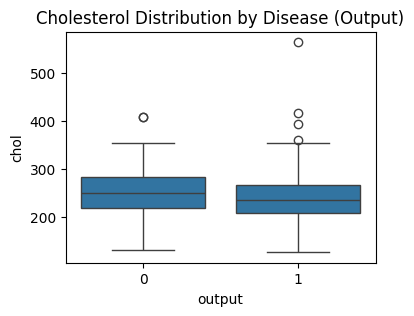

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

# Load the dataset
df = pd.read_csv('/content/sample_data/heart.csv')

# Check for missing values and handle them if necessary
print("Missing values in each column:\n", df.isnull().sum())

# Summary statistics
print("\nSummary statistics:\n", df.describe())

# Identify categorical and numerical columns
categorical_columns = ['sex', 'cp', 'fbs', 'restecg', 'exng', 'slp', 'caa', 'thall']
numerical_columns = ['age', 'trtbps', 'chol', 'thalachh', 'oldpeak']

# Handle missing values (if any) - Impute using median for numerical and mode for categorical
imputer = ColumnTransformer(
    transformers=[
        ('num', SimpleImputer(strategy='median'), numerical_columns),
        ('cat', SimpleImputer(strategy='most_frequent'), categorical_columns)
    ])

# Apply imputation
df[numerical_columns + categorical_columns] = imputer.fit_transform(df[numerical_columns + categorical_columns])

# Encoding categorical variables and normalizing features
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first'), categorical_columns),  # Encode categorical
        ('num', StandardScaler(), numerical_columns)  # Standardize numerical features
    ])

# Apply preprocessing
df_processed = preprocessor.fit_transform(df)

# Convert to DataFrame with column names
df_processed = pd.DataFrame(df_processed, columns=[*preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_columns), *numerical_columns])

# Plot Histograms for numerical features
df[numerical_columns].hist(bins=20, figsize=(5,4))
plt.suptitle("Histograms of Numerical Features")
plt.show()

# Scatter plot: Age vs Cholesterol
plt.figure(figsize=(4,3))
sns.scatterplot(x='age', y='chol', hue='output', data=df)
plt.title('Age vs Cholesterol')
plt.show()

# Box plots for each numerical feature
plt.figure(figsize=(5,4))
df[numerical_columns].boxplot()
plt.title("Box plot of Numerical Features")
plt.xticks(rotation=45)
plt.show()

# Box plot: Cholesterol by target output
plt.figure(figsize=(4,3))
sns.boxplot(x='output', y='chol', data=df)
plt.title('Cholesterol Distribution by Disease (Output)')
plt.show()


**Model implementation**

In [ ]:
Logistic Regression

Mean Absolute Error (MAE): 0.13186813186813187
Mean Squared Error (MSE): 0.13186813186813187
R-squared: 0.4673170731707317


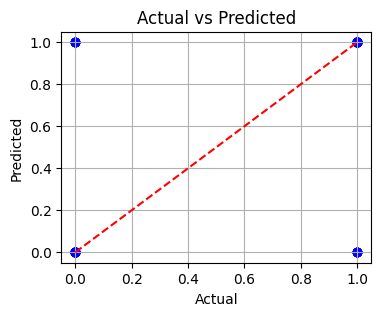

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

# Load the dataset
df = pd.read_csv('/content/sample_data/heart.csv')

# Define features (X) and target (y)
X = df.drop(columns=['output'])  # Drop target column
y = df['output']  # Target column

# Split the dataset (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Identify categorical columns
categorical_columns = ['sex', 'cp', 'fbs', 'restecg', 'exng', 'slp', 'caa', 'thall']

# Preprocessing: OneHotEncode categorical columns and standardize the rest
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first'), categorical_columns),  # Encode categorical
        ('num', StandardScaler(), ['age', 'trtbps', 'chol', 'thalachh', 'oldpeak'])  # Standardize numerical features
    ])

# Apply transformations to training and test data
X_train_transformed = preprocessor.fit_transform(X_train)
X_test_transformed = preprocessor.transform(X_test)

# Logistic Regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train_transformed, y_train)

# Predicting on test set
y_pred = model.predict(X_test_transformed)

# Calculate metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Display metrics
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'R-squared: {r2}')

# Visualizing actual vs predicted values
plt.figure(figsize=(4,3))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.title('Actual vs Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.grid(True)
plt.show()


Decision Tree

Accuracy: 0.8351648351648352
Precision: 0.8571428571428571
Recall: 0.84
F1 Score: 0.8484848484848485


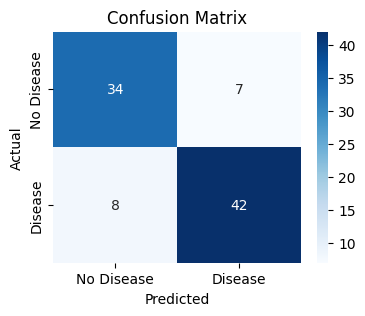

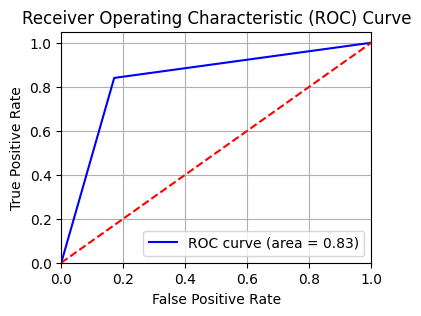

ROC AUC Score: 0.83


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import roc_curve, auc, roc_auc_score
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('/content/sample_data/heart.csv')

# Define features (X) and target (y)
X = df.drop(columns=['output'])  # Drop the target column
y = df['output']  # Target column

# Split the dataset (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Identify categorical columns
categorical_columns = ['sex', 'cp', 'fbs', 'restecg', 'exng', 'slp', 'caa', 'thall']

# Preprocessing: OneHotEncode categorical columns and standardize the rest
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first'), categorical_columns),  # Encode categorical
        ('num', StandardScaler(), ['age', 'trtbps', 'chol', 'thalachh', 'oldpeak'])  # Standardize numerical features
    ])

# Apply transformations to training and test data
X_train_transformed = preprocessor.fit_transform(X_train)
X_test_transformed = preprocessor.transform(X_test)

# Random Forest model
model = RandomForestClassifier(random_state=42)
model.fit(X_train_transformed, y_train)

# Predicting on test set
y_pred = model.predict(X_test_transformed)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Display metrics
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

# Confusion matrix visualization
plt.figure(figsize=(4,3))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Disease', 'Disease'], yticklabels=['No Disease', 'Disease'])
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Plotting the ROC curve
plt.figure(figsize=(4,3))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Dashed diagonal
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

# AUC Score
print(f'ROC AUC Score: {roc_auc:.2f}')


In [ ]:
Random Forest

Accuracy: 0.7252747252747253
Precision: 0.7659574468085106
Recall: 0.72
F1 Score: 0.7422680412371134


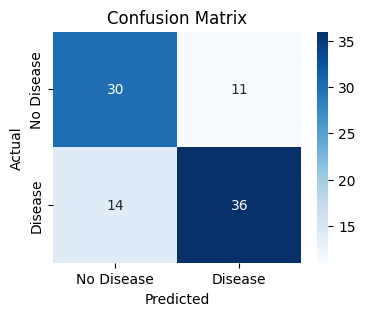

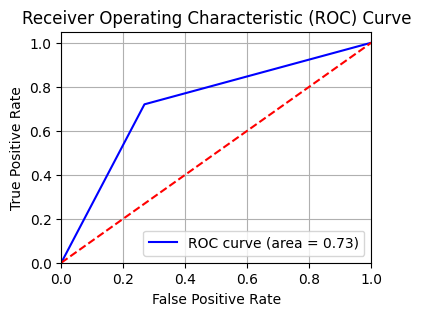

ROC AUC Score: 0.73


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import roc_curve, auc, roc_auc_score
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('/content/sample_data/heart.csv')

# Define features (X) and target (y)
X = df.drop(columns=['output'])  # Drop target column
y = df['output']  # Target column

# Split the dataset (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Identify categorical columns
categorical_columns = ['sex', 'cp', 'fbs', 'restecg', 'exng', 'slp', 'caa', 'thall']

# Preprocessing: OneHotEncode categorical columns and standardize the rest
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first'), categorical_columns),  # Encode categorical
        ('num', StandardScaler(), ['age', 'trtbps', 'chol', 'thalachh', 'oldpeak'])  # Standardize numerical features
    ])

# Apply transformations to training and test data
X_train_transformed = preprocessor.fit_transform(X_train)
X_test_transformed = preprocessor.transform(X_test)

# Decision Tree model
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train_transformed, y_train)

# Predicting on test set
y_pred = model.predict(X_test_transformed)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Display metrics
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

# Confusion matrix visualization
plt.figure(figsize=(4,3))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Disease', 'Disease'], yticklabels=['No Disease', 'Disease'])
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Plotting the ROC curve
plt.figure(figsize=(4,3))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Dashed diagonal
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

# AUC Score
print(f'ROC AUC Score: {roc_auc:.2f}')


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import numpy as np

# Load the dataset
df = pd.read_csv('/content/sample_data/heart.csv')

# Define features (X) and target (y)
X = df.drop(columns=['output'])  # Drop target column
y = df['output']  # Target column

# Split the dataset (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Identify categorical columns
categorical_columns = ['sex', 'cp', 'fbs', 'restecg', 'exng', 'slp', 'caa', 'thall']

# Preprocessing: OneHotEncode categorical columns and standardize the rest
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first'), categorical_columns),  # Encode categorical
        ('num', StandardScaler(), ['age', 'trtbps', 'chol', 'thalachh', 'oldpeak'])  # Standardize numerical features
    ])

# Apply transformations to training and test data
X_train_transformed = preprocessor.fit_transform(X_train)
X_test_transformed = preprocessor.transform(X_test)

# Define the model
model = RandomForestClassifier(random_state=42)

# Define the hyperparameter space for Random Search
param_dist = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [10, 20, 30, 40, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# RandomizedSearchCV for hyperparameter tuning
random_search = RandomizedSearchCV(model, param_distributions=param_dist,
                                   n_iter=10, cv=5, verbose=2, random_state=42, n_jobs=-1)

# Fit the model with the training data
random_search.fit(X_train_transformed, y_train)

# Print the best hyperparameters
print("Best Hyperparameters:", random_search.best_params_)

# Predict with the best estimator on test data
best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test_transformed)

# Calculate and print performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Display performance
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print("Confusion Matrix:")
print(conf_matrix)


Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Hyperparameters: {'n_estimators': 300, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_depth': 30, 'bootstrap': True}
Accuracy: 0.8351648351648352
Precision: 0.8571428571428571
Recall: 0.84
F1 Score: 0.8484848484848485
Confusion Matrix:
[[34  7]
 [ 8 42]]
